In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

DATA_PATH = '../bds/TSLA.csv'

# 1. PRELIMINARES

Na cédula a seguir lemos o conjunto de dados sobre o preço de ações da empresa Tesla, e visualizamos o cabeçalho com alguns dados.

In [3]:
bd_tesla = pd.read_csv(DATA_PATH, sep=',')
bd_tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-12,15.532667,15.718000,15.250000,15.267333,15.267333,69958500
1,2019-08-13,15.254000,15.733333,15.170000,15.666667,15.666667,72721500
2,2019-08-14,15.414000,15.433333,14.446000,14.641333,14.641333,143439000
3,2019-08-15,14.724000,14.770667,14.103333,14.376000,14.376000,122394000
4,2019-08-16,14.444000,14.816000,14.401333,14.662667,14.662667,76477500


In [4]:
bd_tesla['Date'][0]

'2019-08-12'

In [5]:
print(f'Shape: {bd_tesla.shape}')
print(f'Nome das colunas: {bd_tesla.columns}')
print(f'Data Inicial:{bd_tesla['Date'][0]} \nData Final: {bd_tesla['Date'][1257]}')
print(f'Informações sobre o conjunto de dados: {bd_tesla.info()}')


Shape: (1258, 7)
Nome das colunas: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Data Inicial:2019-08-12 
Data Final: 2024-08-09
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB
Informações sobre o conjunto de dados: None


In [6]:
bd_tesla['Date'] = pd.to_datetime(bd_tesla['Date'])

In [7]:
print(f'Análise descritiva dos dados de valor de fechamento da empresa TESLA \n{bd_tesla['Close'].describe()}')

Análise descritiva dos dados de valor de fechamento da empresa TESLA 
count    1258.000000
mean      192.324003
std        92.497796
min        14.093333
25%       141.327503
50%       207.800003
75%       252.487495
max       409.970001
Name: Close, dtype: float64


In [8]:
def histPlot(data, var_name):
    plt.figure(figsize=(5.5, 5.5))
    g = sns.histplot(np.array(data[var_name]))
    g.set_xlabel(var_name);
    g.set_ylabel('frequência');

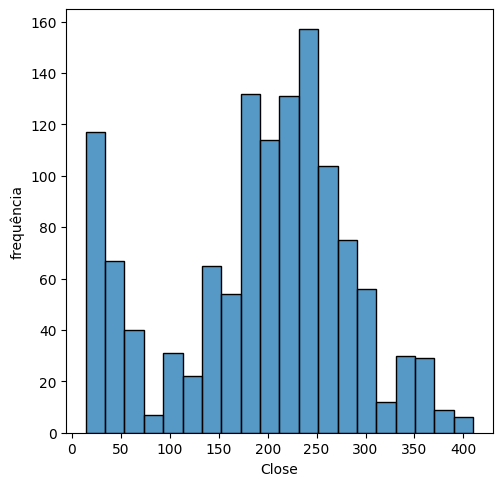

In [9]:
histPlot(bd_tesla,'Close')
# bimodal -> normal e exponencial

Esse gráfico de dispersão permite analisar a relação entre os preços de abertura (Open) e os preços de fechamento (Close) das ações da Tesla. Cada ponto no gráfico representa um dia de negociação, com o valor de abertura no eixo x e o valor de fechamento no eixo y.

<Axes: xlabel='Open', ylabel='Close'>

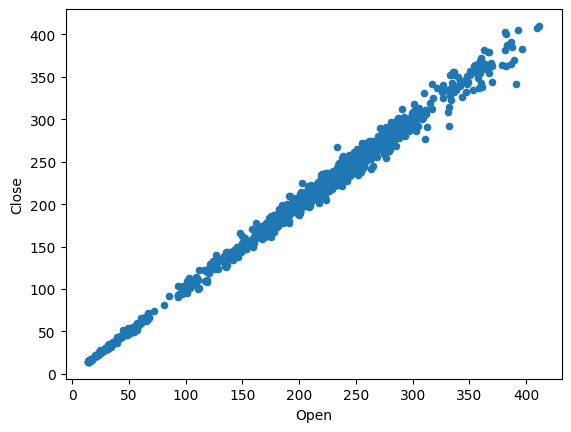

In [10]:
bd_tesla.plot(x='Open', y='Close', kind='scatter')

Esse gráfico de dispersão permite analisar a relação entre os maiores preços (High) e os preços de fechamento (Close) das ações da Tesla. Cada ponto no gráfico representa um dia de negociação, com o valor de abertura no eixo x e o valor de fechamento no eixo y.

<Axes: xlabel='High', ylabel='Close'>

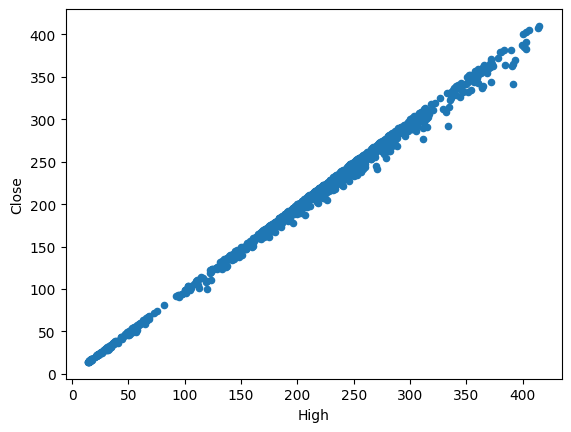

In [11]:
bd_tesla.plot(x='High', y='Close', kind='scatter')

# 2. SÉRIE TEMPORAL

Geramos na cédula seguinte uma série temporal, sendo o tempo como elemento temporal.
A períoticidade da série temporal é diária, e temos como valor target (alvo) o valor de fechamento desta ação no dia.

In [12]:
TM_tesla = bd_tesla[['Date','Close']]


Visualizamos no gráfico a seguir o preço de fechamento das ações da tesla entre o ano de 2010 até o ano de 2024.
Notamos que tal ação por exemplo teve um crescimento alto em 2020, onde tece uma ascenção no mercado, continuando o seu nível elevado em comparação às datas anteriores a 2020.

In [13]:
fig = px.line(TM_tesla, x='Date', y='Close', title='Série Temporal dos Preço de fechamento das ações da Tesla')
fig.show()

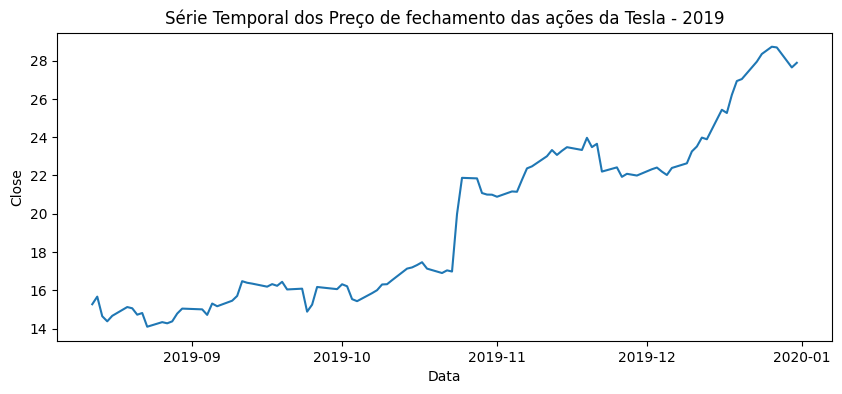

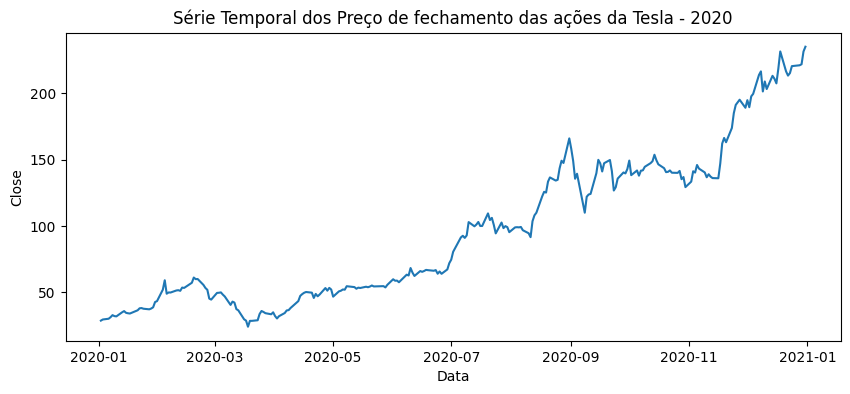

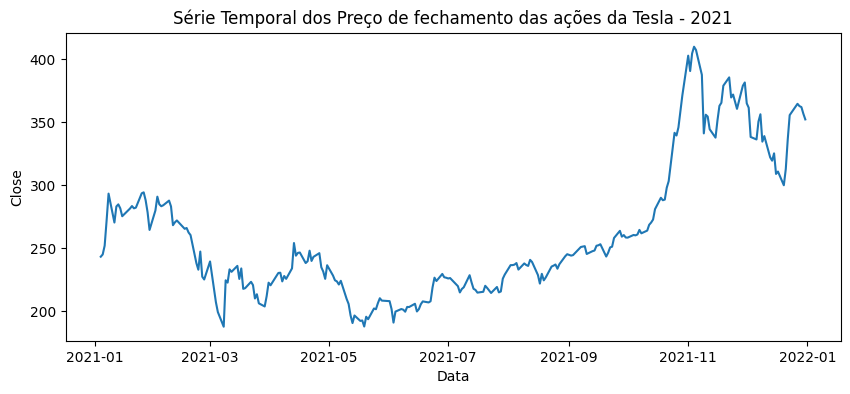

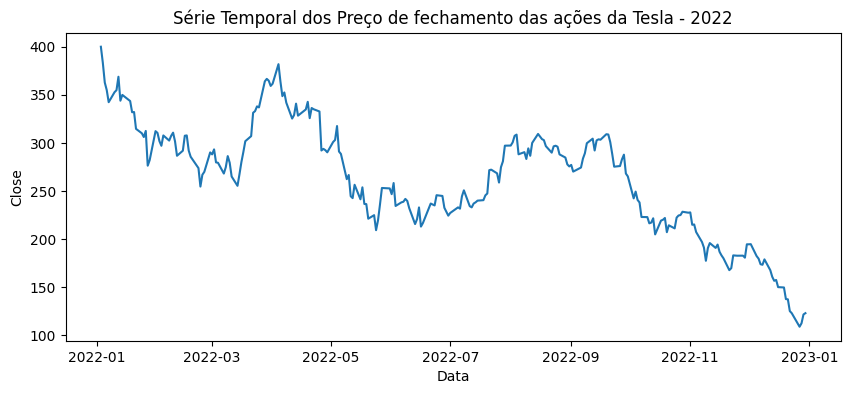

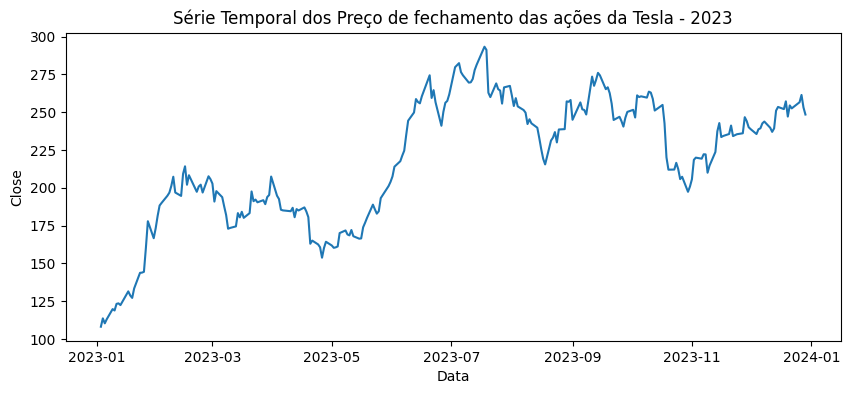

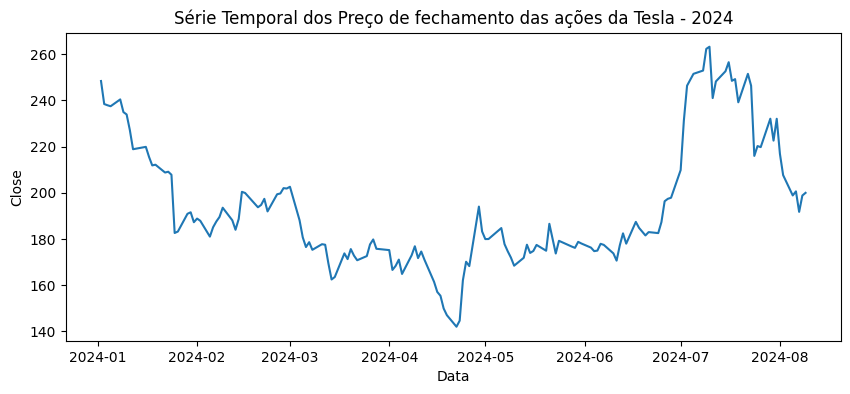

In [14]:
# Plotar a série temporal de cada ano separadamente
for year in range(2019, 2025):
    df_year = TM_tesla[TM_tesla['Date'].dt.year == year] 
    plt.figure(figsize=(10, 4))
    plt.plot(df_year['Date'], df_year['Close']) 
    plt.title(f'Série Temporal dos Preço de fechamento das ações da Tesla - {year}')
    plt.xlabel('Data')
    plt.ylabel('Close')
    plt.show()

In [15]:
# variavel de calendario dado a data sabemos o indice do ano
# deixar o ano de 2024 para teste

## 2.2 MODELO DE TENDÊNCIA LINEAR

In [16]:
X_total  = TM_tesla['Date'].index
print(X_total.values)

[   0    1    2 ... 1255 1256 1257]


In [17]:
modelo_tendencia = LinearRegression(fit_intercept= True)
modelo_tendencia.fit(X_total.values.reshape(-1, 1), TM_tesla['Close'])
print(f'Coeficiente do modelo de tendência={modelo_tendencia.coef_[0]} \nintercepto={modelo_tendencia.intercept_}')

Coeficiente do modelo de tendência=0.1357672715752462 
intercepto=106.99427293419465


In [18]:
TM_tesla.loc[:, 'LM'] = modelo_tendencia.predict(X_total.values.reshape(-1, 1))

C:\Users\allan\AppData\Local\Temp\ipykernel_8772\613035953.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



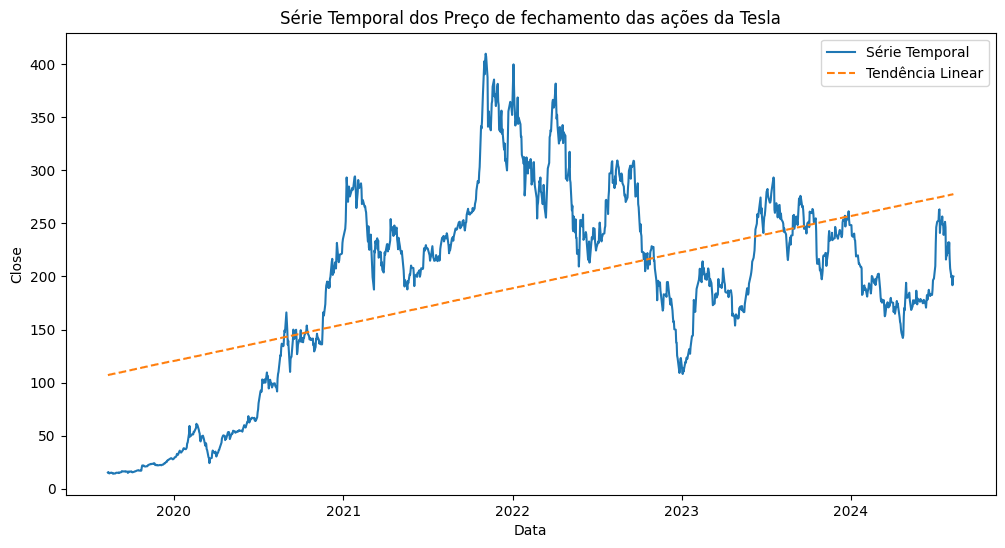

In [19]:
figsize = (12, 6)
plt.figure(figsize=figsize)
plt.plot(TM_tesla['Date'], TM_tesla['Close'], label='Série Temporal')
plt.plot(TM_tesla['Date'], TM_tesla['LM'], label='Tendência Linear', linestyle='--')
plt.title('Série Temporal dos Preço de fechamento das ações da Tesla')
plt.xlabel('Data')
plt.ylabel('Close')
plt.legend()
plt.show()

### 2.2.2 RESÍDUOS

C:\Users\allan\AppData\Local\Temp\ipykernel_8772\3545044819.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



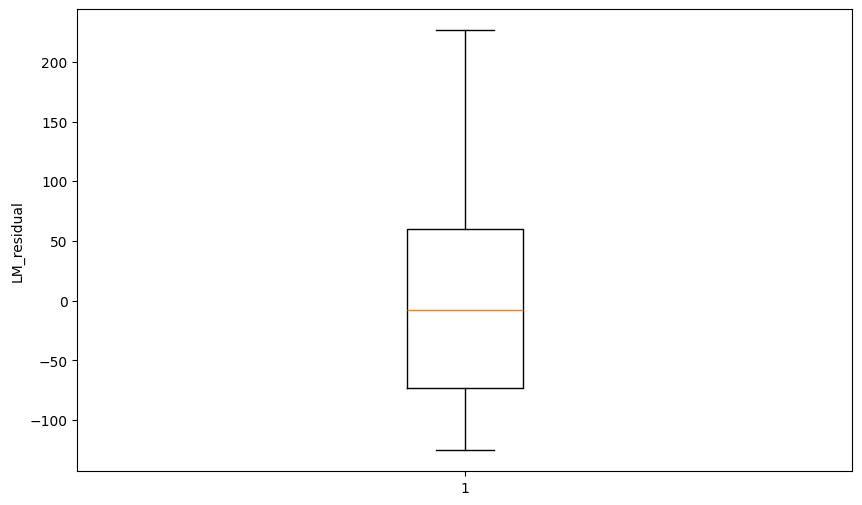

In [20]:
TM_tesla.loc[:,'LM_res'] = TM_tesla['Close']- TM_tesla['LM']

figsize = (10, 6)  
plt.figure(figsize=figsize)
plt.boxplot(TM_tesla['LM_res'])
plt.ylabel('LM_residual')
plt.show()

In [21]:
# fazer um histograma do resíduo

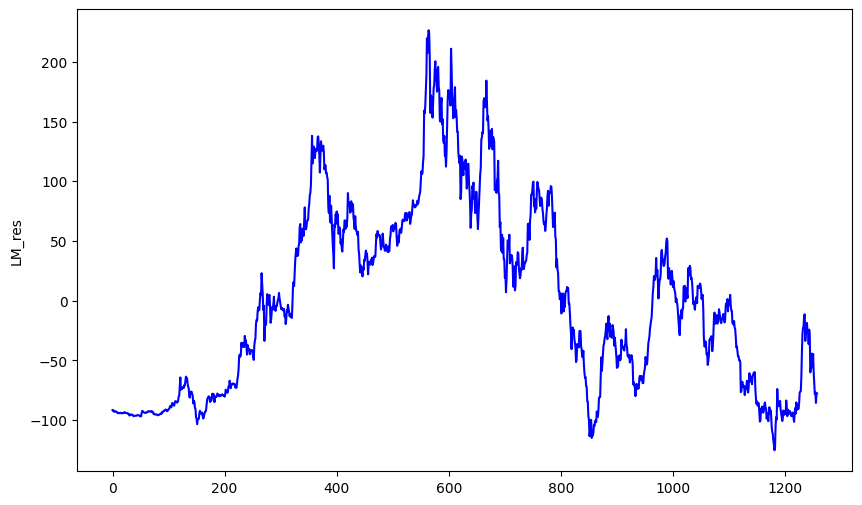

In [22]:
TM_tesla['LM_res'].plot(color='b', figsize=figsize, ylabel='LM_res');

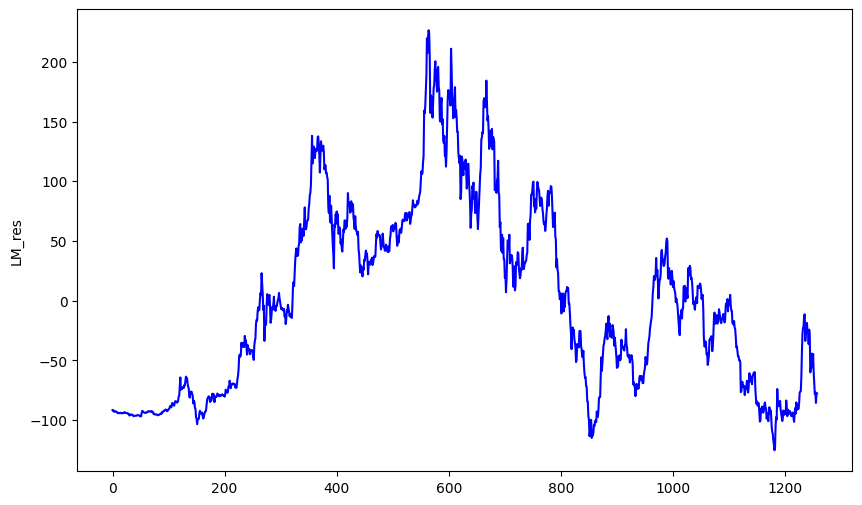

In [23]:
TM_tesla['LM_res'].plot(color='b', figsize=figsize, ylabel='LM_res');

In [24]:
TM_tesla.columns = ['date', 'y(t)', 'p1(t)', 'e1(t)']
TM_tesla.loc[:,'e1(t-1)'] = TM_tesla['e1(t)'].shift(1)
TM_tesla.columns
TM_tesla.head(5)

C:\Users\allan\AppData\Local\Temp\ipykernel_8772\275642655.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,y(t),p1(t),e1(t),e1(t-1)
0,2019-08-12,15.267333,106.994273,-91.726940,NaN
1,2019-08-13,15.666667,107.130040,-91.463373,-91.726940
2,2019-08-14,14.641333,107.265807,-92.624474,-91.463373
3,2019-08-15,14.376000,107.401575,-93.025575,-92.624474
4,2019-08-16,14.662667,107.537342,-92.874675,-93.025575


A matriz de correlação mostra uma relação muito forte entre e1(t-1) e e1(t), com um valor de 0.995575, indicando que os valores da série temporal em períodos consecutivos estão fortemente correlacionados. Isso sugere uma forte persistência na série temporal, onde o valor atual é quase previsível a partir do valor anterior. A correlação próxima de 1 reforça a ideia de continuidade e dependência temporal. Esse padrão é típico em modelos autorregressivos (AR), onde valores passados influenciam significativamente os valores futuros.

>> correlation matrix:
           e1(t-1)     e1(t)
e1(t-1)  1.000000  0.994696
e1(t)    0.994696  1.000000


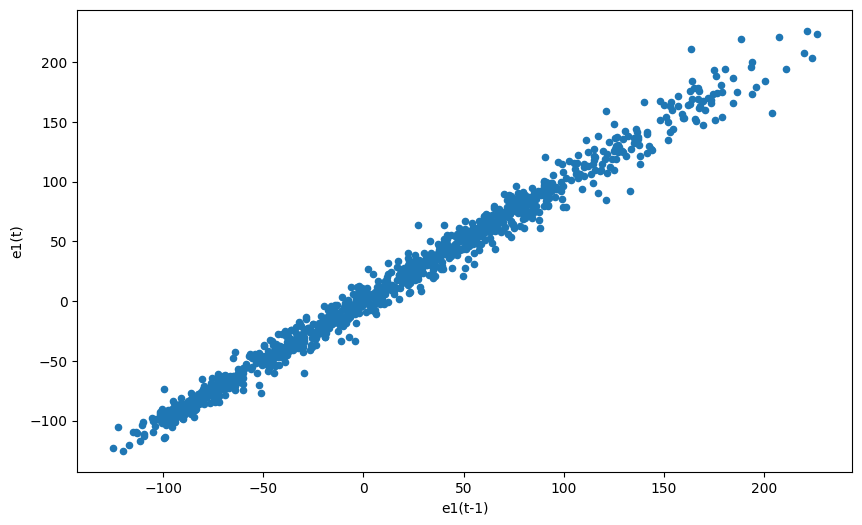

In [25]:
TM_tesla.plot(x='e1(t-1)', y='e1(t)', figsize=figsize, kind='scatter');
print('>> correlation matrix:\n', TM_tesla[['e1(t-1)', 'e1(t)']].corr(method='pearson'))

In [26]:
TM_tesla.loc[:,'e1(t-2)'] = TM_tesla['e1(t)'].shift(2)

C:\Users\allan\AppData\Local\Temp\ipykernel_8772\862498703.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



A matriz de correlação mostra que e1(t-2) e e1(t) têm uma correlação alta de 0.991374, indicando que os valores de e1 em dois períodos distantes (t-2 e t) estão fortemente relacionados. 

>> correlation matrix:
          e1(t-2)    e1(t)
e1(t-2)  1.00000  0.98966
e1(t)    0.98966  1.00000


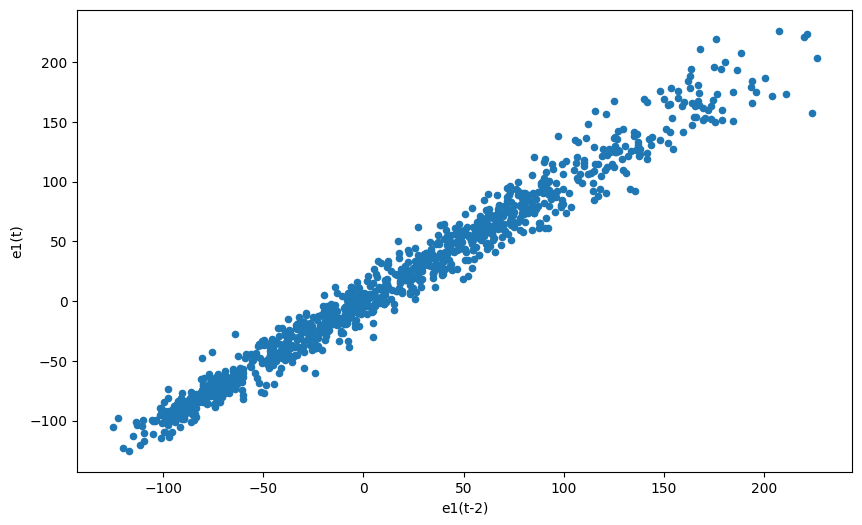

In [27]:
TM_tesla.plot(x='e1(t-2)', y='e1(t)', figsize=figsize, kind='scatter');
print('>> correlation matrix:\n', TM_tesla[['e1(t-2)', 'e1(t)']].corr(method='pearson'))

In [28]:
# nova variavel booleana para identendificar se é um outilier ou não

In [29]:
TM_tesla.loc[:,'e1(t-3)'] = TM_tesla['e1(t)'].shift(3)

A matriz de correlação mostra que e1(t-3) e e1(t) têm uma correlação alta de 0.987059, indicando uma forte relação entre os valores de e1 em períodos distantes (t-3 e t)

>> correlation matrix:
           e1(t-3)     e1(t)
e1(t-3)  1.000000  0.984489
e1(t)    0.984489  1.000000


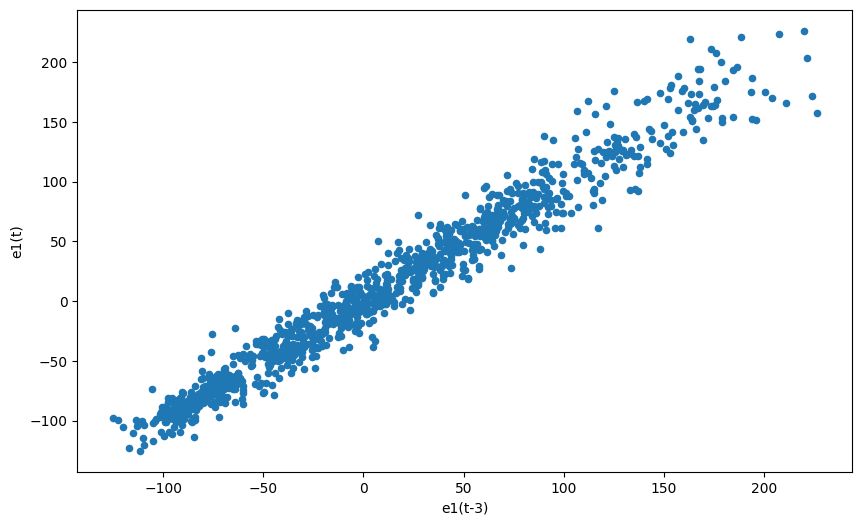

In [30]:
TM_tesla.plot(x='e1(t-3)', y='e1(t)', figsize=figsize, kind='scatter');
print('>> correlation matrix:\n', TM_tesla[['e1(t-3)', 'e1(t)']].corr(method='pearson'))

### 2.2.3 AUTOCORRELAÇÃO (ACF) E AUTOCORRELAÇÃO PARCIAL (PACF)

In [31]:
TM_tesla.columns

Index(['date', 'y(t)', 'p1(t)', 'e1(t)', 'e1(t-1)', 'e1(t-2)', 'e1(t-3)'], dtype='object')

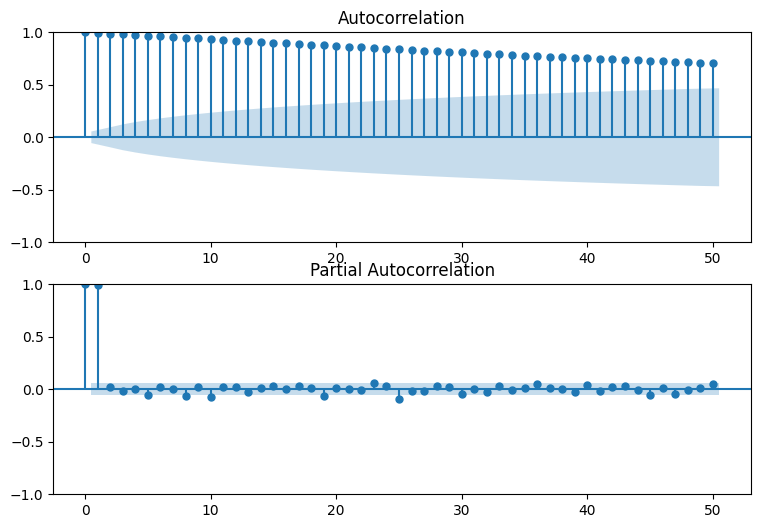

In [32]:
import statsmodels
import statsmodels.api as sm
#from statsmodels.tsa.stattools import coint, adfuller
fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(TM_tesla['e1(t)'], lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(TM_tesla['e1(t)'], lags=50, ax=ax2)

significantLags: [1, 5, 8, 10, 19, 23, 25, 45, 50, 57, 64]


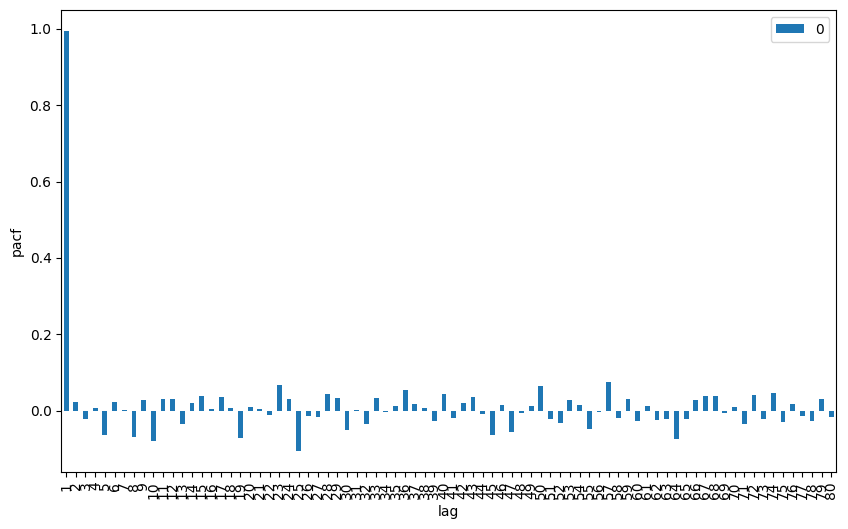

In [33]:
def getSignificantLags(y, nLags = 5, alpha=0.05):
    pac, pac_ci = sm.tsa.pacf(x=y, nlags=nLags, alpha=alpha)
    pd.DataFrame(pac)[1:].plot(kind='bar', figsize=figsize, legend='pacf',
                               xlabel='lag', ylabel='pacf');
    significantLags = []
    for i in range(1, len(pac)):
        # print(pac[i], pac_ci[i][0], pac_ci[i][1])
        if pac[i] < pac_ci[i][0] - pac[i] or pac[i] > pac_ci[i][1] - pac[i]:
            significantLags.append(i)
    print('significantLags:', significantLags)
    return significantLags

e1_significantLags = getSignificantLags(y=TM_tesla['e1(t)'], nLags = 80, alpha=0.05)

Se $e_t$ são instâncias de $\varepsilon_t$. 

Assim, pode-se ter $e_t$ como uma função que depende de $e_{t-1}, e_{t-5}, e_{t-8}, e_{t-10}, e_{t-19},e_{t-23}, e_{t-25}, e_{t-45}, e_{t-50}$: 

$e_t = f(e_{t-1}, e_{t-5}, e_{t-8}, e_{t-10}, e_{t-19},e_{t-23}, e_{t-25}, e_{t-45}, e_{t-50})$. 



# 3. MODELAGEM


## 3.1 FEATURE ENGINEERING

In [34]:
def appendLagVariables(yNm, significantLags, df, dropna=True):
    prefix = yNm.replace(')', '')
    df = df.copy()
    for lag in significantLags:
        varNm = prefix+'-'+str(lag)+')'
        # nDj = pd.concat([nDj, nDj[['e1(t)']].shift(lag)], axis=1)
        df[varNm] = df[yNm].shift(lag)
        # nDj.columns = nDj.columns + [varNm]
    if dropna:
        df.dropna(axis=0, inplace=True)
    display(df.head(2))
    return df

TM_tesla_eng = appendLagVariables(yNm='e1(t)', 
                         significantLags = e1_significantLags, 
                         df = TM_tesla, 
                         dropna=True)

,date,y(t),p1(t),e1(t),e1(t-1),e1(t-2),e1(t-3),e1(t-5),e1(t-8),e1(t-10),e1(t-19),e1(t-23),e1(t-25),e1(t-45),e1(t-50),e1(t-57),e1(t-64)
64,2019-11-11,23.006001,115.683378,-92.677377,-93.071611,-93.042511,-93.504078,-93.839875,-93.596572,-92.478372,-95.911133,-96.258731,-96.441197,-94.121184,-93.854348,-93.222644,-91.726940
65,2019-11-12,23.328667,115.819146,-92.490479,-92.677377,-93.071611,-93.042511,-93.992308,-93.738340,-93.380140,-95.922899,-96.380498,-96.421632,-94.006951,-94.030115,-93.270411,-91.463373


### 3.2 MODELAGEM LINEAR DOS RESÍDUOS DO MODELO DE TENDÊNCIA LINEAR

In [35]:
y1_name = 'e1(t)'
x1_names = [var_nm for var_nm in TM_tesla_eng.columns if 'e1(t-' in var_nm]
y1_train = TM_tesla_eng[[y1_name]]
x1_train = TM_tesla_eng[x1_names]

In [36]:
display(y1_train[:3])
display(x1_train.iloc[:3,:])

,e1(t)
64,-92.677377
65,-92.490479
66,-92.880914


,e1(t-1),e1(t-2),e1(t-3),e1(t-5),e1(t-8),e1(t-10),e1(t-19),e1(t-23),e1(t-25),e1(t-45),e1(t-50),e1(t-57),e1(t-64)
64,-93.071611,-93.042511,-93.504078,-93.839875,-93.596572,-92.478372,-95.911133,-96.258731,-96.441197,-94.121184,-93.854348,-93.222644,-91.726940
65,-92.677377,-93.071611,-93.042511,-93.992308,-93.738340,-93.380140,-95.922899,-96.380498,-96.421632,-94.006951,-94.030115,-93.270411,-91.463373
66,-92.490479,-92.677377,-93.071611,-93.504078,-93.981442,-93.596572,-95.910669,-96.306267,-96.258731,-93.372053,-94.454549,-94.122845,-92.624474


In [ ]:
# não fazer isso dnv

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x1_train, y1_train, test_size=0.2, shuffle=False)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
lin_reg = LinearRegression() 
lin_reg.fit(X_train, y_train)

LinearRegression()

Alta Influência: Coeficientes grandes em valor absoluto (por exemplo, e1(t-1)) têm maior influência na previsão do modelo.

Influência Menor: Coeficientes menores em valor absoluto (por exemplo, e1(t-8)) têm uma influência menor.

Direção: Coeficientes positivos aumentam a previsão, enquanto coeficientes negativos a diminuem.

,feature,coefficient,|coefficient|
0,e1(t-1),0.965851,0.965851
7,e1(t-23),0.052493,0.052493
8,e1(t-25),-0.044662,0.044662
1,e1(t-2),0.042333,0.042333
5,e1(t-10),-0.029900,0.029900
10,e1(t-50),0.017885,0.017885
2,e1(t-3),0.015489,0.015489
12,e1(t-64),-0.011395,0.011395
6,e1(t-19),-0.011333,0.011333
9,e1(t-45),-0.010327,0.010327


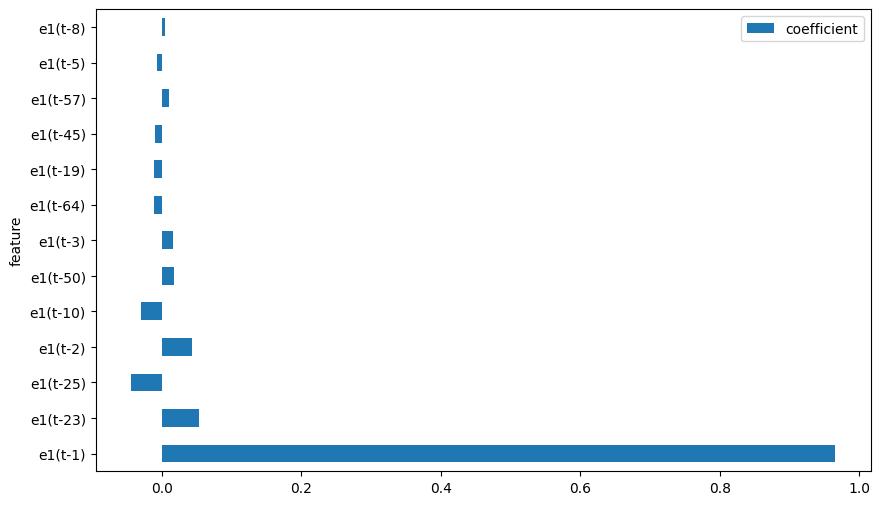

In [39]:
lin_regCoefsDf = pd.DataFrame({'feature':(X_train.columns.tolist()), 
               'coefficient':lin_reg.coef_.tolist()[0],
               '|coefficient|':np.abs(lin_reg.coef_).tolist()[0]}).\
                   sort_values(by=['|coefficient|'], ascending=False)   
lin_regCoefsDf.plot(x='feature', y='coefficient', kind = 'barh', figsize=figsize);
display(lin_regCoefsDf)

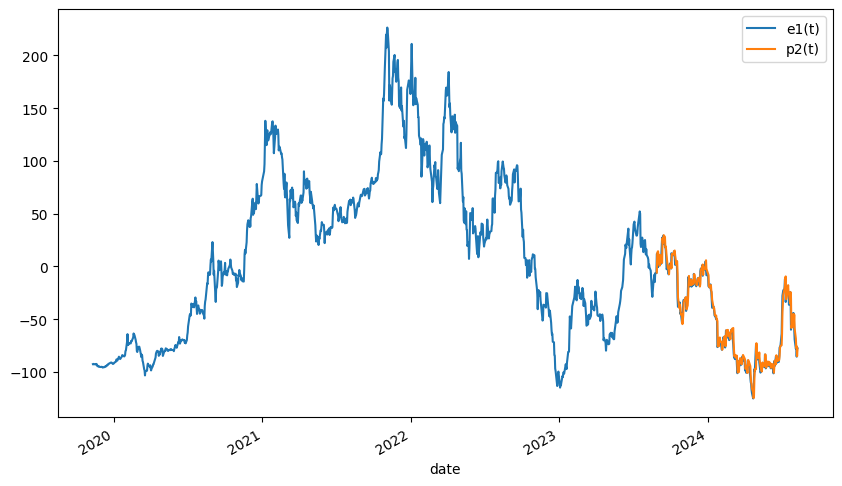

In [40]:
TM_tesla_eng['p2(t)'] = np.nan
predictions = lin_reg.predict(X=X_test)
TM_tesla_eng.loc[X_test.index, 'p2(t)'] = predictions
TM_tesla_eng.plot(x = 'date', y=['e1(t)', 'p2(t)'], figsize=figsize);

>> correlation matrix:
           p2(t)     e1(t)
p2(t)  1.000000  0.983348
e1(t)  0.983348  1.000000


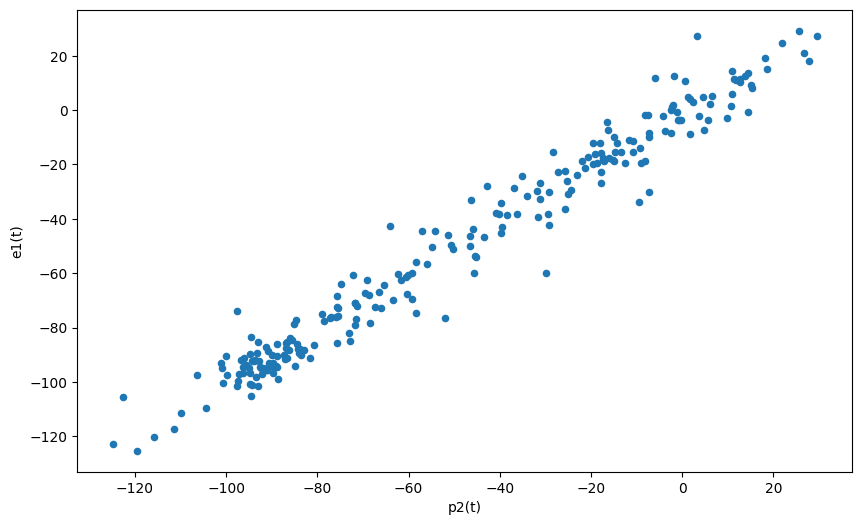

In [41]:
TM_tesla_eng.plot(x = 'p2(t)', y='e1(t)', figsize=figsize, kind='scatter');
print('>> correlation matrix:\n', TM_tesla_eng[['p2(t)', 'e1(t)']].corr(method='pearson'))

In [42]:
def calculate_metrics(y_true, y_pred):
    """
    Calcula as métricas de desempenho para um modelo de regressão e retorna um DataFrame com os resultados.

    Parameters:
    - y_true: Valores reais (pandas Series ou numpy array)
    - y_pred: Valores previstos pelo modelo (pandas Series ou numpy array)

    Returns:
    - metrics_df: DataFrame com as métricas de desempenho
    """
    # Calcular as métricas
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    # Criar o DataFrame com as métricas
    metrics_df = pd.DataFrame({
        'Metric': ['MAE', 'MSE', 'RMSE', 'R²', 'MAPE'],
        'Value': [mae, mse, rmse, r2, mape]
    })

    return metrics_df

- Erro Médio Absoluto (MAE): Com um valor de 5.216, em média, o modelo erra por aproximadamente 5.216 unidades em relação ao valor real. Isso representa o erro médio das previsões do modelo.

- Erro Quadrático Médio (MSE): O MSE é 52.496, indicando que o erro quadrático médio das previsões é relativamente alto. Esta métrica penaliza erros grandes mais severamente do que o MAE.

- Raiz do Erro Quadrático Médio (RMSE): Com um valor de 7.245, o RMSE é a raiz quadrada do MSE e oferece uma ideia do erro médio em unidades da variável de resposta, sendo mais interpretável em termos das unidades dos dados.

- Coeficiente de Determinação (R²): O valor de 0.965 sugere que aproximadamente 96.5% da variância nos dados é explicada pelo modelo, indicando um ajuste muito bom.

- Erro Absoluto Médio Percentual (MAPE): Com 38.69%, o MAPE mostra que o erro percentual médio é cerca de 38.69%, o que pode indicar que, em média, o modelo tem uma precisão moderada.

In [43]:
calculate_metrics(y_test,predictions)

,Metric,Value
0,MAE,5.255228
1,MSE,53.366860
2,RMSE,7.305262
3,R²,0.966204
4,MAPE,47.709460


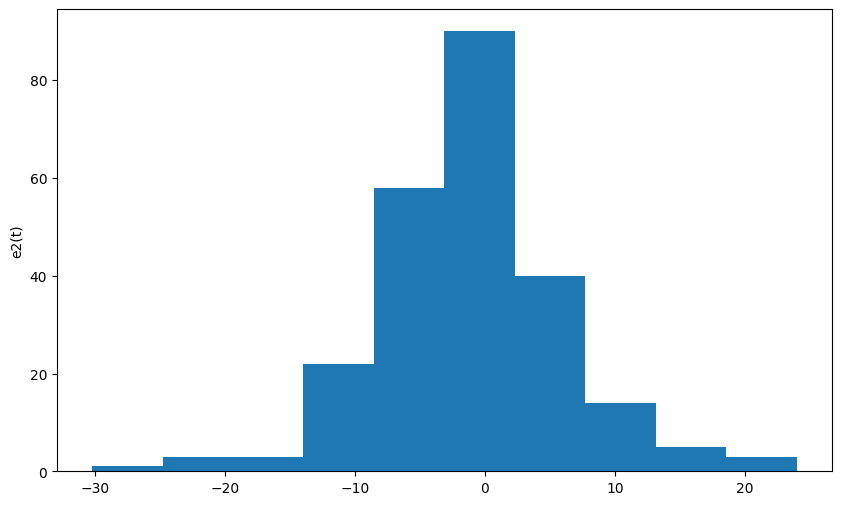

In [44]:
TM_tesla_eng['e2(t)'] = TM_tesla_eng['e1(t)']- TM_tesla_eng['p2(t)']
TM_tesla_eng['e2(t)'].plot(kind='hist', figsize=figsize, 
                         ylabel = 'e2(t)');

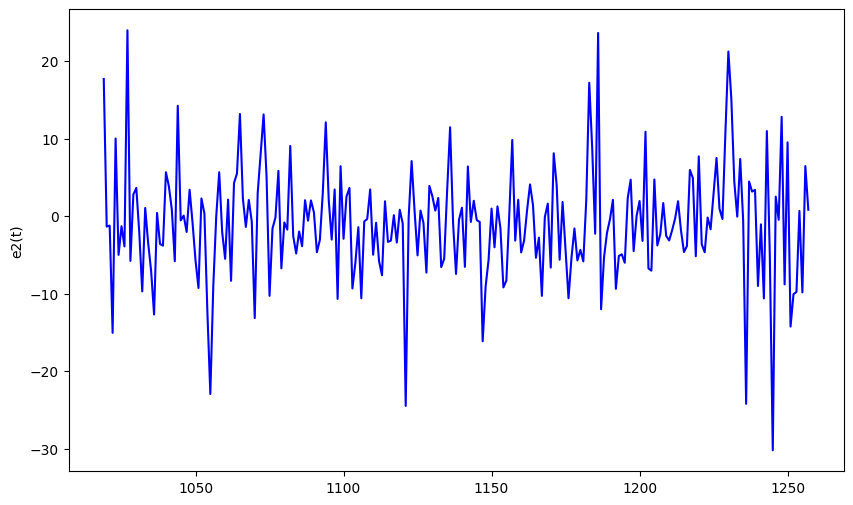

In [45]:
TM_tesla_eng['e2(t)'].plot(color='b', figsize=figsize, ylabel='e2(t)');

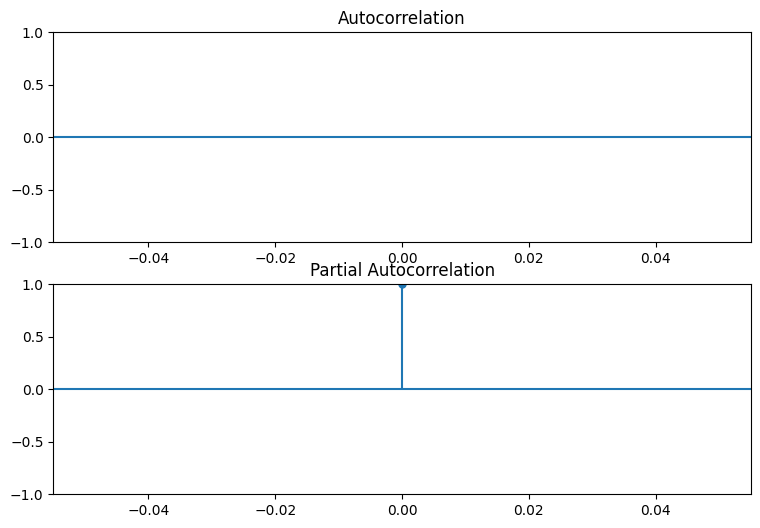

In [46]:
fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(TM_tesla_eng['e2(t)'], lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(TM_tesla_eng['e2(t)'], lags=50, ax=ax2)

significantLags: []


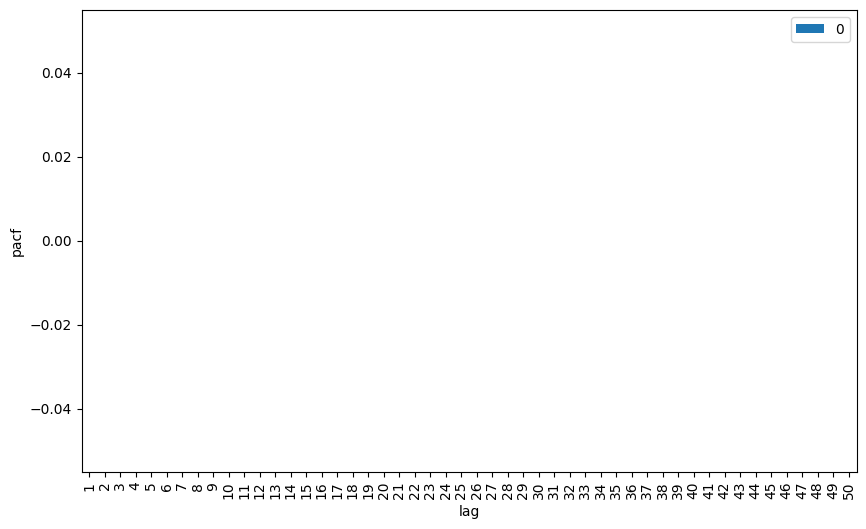

In [47]:
e2_significantLags = getSignificantLags(y=TM_tesla_eng['e2(t)'], nLags = 50, alpha=0.5)

In [ ]:
# VERIFICAR NA

In [48]:
TM_tesla_eng = appendLagVariables(yNm='e2(t)', 
                         significantLags = e2_significantLags, 
                         df = TM_tesla_eng, 
                         dropna=True)

,date,y(t),p1(t),e1(t),e1(t-1),e1(t-2),e1(t-3),e1(t-5),e1(t-8),e1(t-10),e1(t-19),e1(t-23),e1(t-25),e1(t-45),e1(t-50),e1(t-57),e1(t-64),p2(t),e2(t)
1019,2023-08-29,257.179993,245.341123,11.838870,-6.385348,-6.479592,-14.893828,-11.472284,-25.034983,-11.023443,11.348456,13.491532,23.333058,1.818408,21.987250,-13.032381,-43.482019,-5.852131,17.691001
1020,2023-08-30,256.899994,245.476890,11.423104,11.838870,-6.385348,-6.479592,-7.938053,-28.900747,-18.519211,16.422695,24.085759,22.267298,10.842644,35.761486,-2.878154,-35.627781,12.772817,-1.349713
